#### Part 1 - Coding
#### Section 1 - Data Exploration

In [1]:
# Imports
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn                 import metrics

In [2]:
# Get the input features
dat = pd.read_csv('RandomForestClassifier__dat_ref.csv')
dat.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8
0,1216,3,female,NaN,0,0,7.7333,Q,NaN
1,699,3,male,38.0,0,0,8.6625,S,NaN
2,1267,3,female,30.0,1,1,24.1500,S,NaN
3,449,2,female,54.0,1,3,23.0000,S,NaN
4,576,2,male,40.0,0,0,13.0000,S,NaN


In [3]:
# Get the target variable
out = pd.read_csv('RandomForestClassifier__out_ref.csv')
out.head()

,x
0,1
1,0
2,0
3,1
4,0


In [4]:
# Identify the number of unique values  and the number of NaNs for each feature
for feature_name in dat.columns:
    
    print('Name: ', feature_name)
    print('Distinct values: ', len(dat[feature_name].unique()))
    print('NAs: ', sum(pd.isna(dat[feature_name])))
    print('\n')

Name:  id
Distinct values:  850
NAs:  0


Name:  var1
Distinct values:  3
NAs:  0


Name:  var2
Distinct values:  2
NAs:  0


Name:  var3
Distinct values:  89
NAs:  174


Name:  var4
Distinct values:  7
NAs:  0


Name:  var5
Distinct values:  8
NAs:  0


Name:  var6
Distinct values:  237
NAs:  1


Name:  var7
Distinct values:  4
NAs:  1


Name:  var8
Distinct values:  74
NAs:  777




#### Section 2 - Data Quality

In [5]:
# Replace NaNs in numeric features with the feature mean
def replace_na(dataframe):
    
    for feature_name in dataframe.select_dtypes(exclude=['object']).columns:
        
        if sum(pd.isna(dataframe[feature_name])) > 0:
            
            dataframe[feature_name].fillna(dataframe[feature_name].mean(), inplace=True)
            
            print('Found and replaced NAs in: ', feature_name)
            dataframe.head()
        
    return dataframe

replace_na(dat).head()

Found and replaced NAs in:  var3
Found and replaced NAs in:  var6
Found and replaced NAs in:  var8


,id,var1,var2,var3,var4,var5,var6,var7,var8
0,1216,3,female,29.519847,0,0,7.7333,Q,165.821918
1,699,3,male,38.000000,0,0,8.6625,S,165.821918
2,1267,3,female,30.000000,1,1,24.1500,S,165.821918
3,449,2,female,54.000000,1,3,23.0000,S,165.821918
4,576,2,male,40.000000,0,0,13.0000,S,165.821918


#### Section 3 - Predictive Modelling

In [13]:
# Removing an irrelevant feature
dat = dat.drop('var8', axis = 1)
dat.head()

,id,var1,var2,var3,var4,var5,var6,var7
0,1216,3,female,29.519847,0,0,7.7333,Q
1,699,3,male,38.000000,0,0,8.6625,S
2,1267,3,female,30.000000,1,1,24.1500,S
3,449,2,female,54.000000,1,3,23.0000,S
4,576,2,male,40.000000,0,0,13.0000,S


In [14]:
# Verify the dataframe has the expected shape of (850, 9)
dat['out'] = out
print(dat.shape)
dat.head()

(850, 9)


,id,var1,var2,var3,var4,var5,var6,var7,out
0,1216,3,female,29.519847,0,0,7.7333,Q,1
1,699,3,male,38.000000,0,0,8.6625,S,0
2,1267,3,female,30.000000,1,1,24.1500,S,0
3,449,2,female,54.000000,1,3,23.0000,S,1
4,576,2,male,40.000000,0,0,13.0000,S,0


In [15]:
# Identify categoric features
dat.select_dtypes(include=['object'])

,var2,var7
0,female,Q
1,male,S
2,female,S
3,female,S
4,male,S
...,...,...
845,male,S
846,male,C
847,female,S
848,female,S


In [16]:
# Replace these features with a set of binary dummy variables that represent each possible value
for feature_name in dat.select_dtypes(include=['object']).columns:
    
    dat = pd.get_dummies(dat, columns = [feature_name])
    
dat.head()

,id,var1,var3,var4,var5,var6,out,var2_female,var2_male,var7_C,var7_Q,var7_S
0,1216,3,29.519847,0,0,7.7333,1,1,0,0,1,0
1,699,3,38.000000,0,0,8.6625,0,0,1,0,0,1
2,1267,3,30.000000,1,1,24.1500,0,1,0,0,0,1
3,449,2,54.000000,1,3,23.0000,1,1,0,0,0,1
4,576,2,40.000000,0,0,13.0000,0,0,1,0,0,1


In [17]:
# Divide the data into training and testing portions
in_train, in_test, out_train, out_test = train_test_split(dat.drop('out', axis = 1), dat.out, test_size = (1 / 3))

# Make a pipeline to normalise the data befor feeding it to a random forest model
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Display a list of all the hyperparameters for a random forest
hyperparam_names = [param for param in rf_pipeline.get_params().keys() if ('randomforestclassifier__') in param]
hyperparam_names

['randomforestclassifier__bootstrap',
 'randomforestclassifier__ccp_alpha',
 'randomforestclassifier__class_weight',
 'randomforestclassifier__criterion',
 'randomforestclassifier__max_depth',
 'randomforestclassifier__max_features',
 'randomforestclassifier__max_leaf_nodes',
 'randomforestclassifier__max_samples',
 'randomforestclassifier__min_impurity_decrease',
 'randomforestclassifier__min_impurity_split',
 'randomforestclassifier__min_samples_leaf',
 'randomforestclassifier__min_samples_split',
 'randomforestclassifier__min_weight_fraction_leaf',
 'randomforestclassifier__n_estimators',
 'randomforestclassifier__n_jobs',
 'randomforestclassifier__oob_score',
 'randomforestclassifier__random_state',
 'randomforestclassifier__verbose',
 'randomforestclassifier__warm_start']

In [25]:
%%time
# Create lists of possible values for key hyperparameters and perform a randomised search for the best values

# Number of trees in random forest
n_estimators = [200, 400, 800, 1600]

# Maximum number of levels in tree
max_depth = [20, 40, 80, 160]

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

hyper_params = dict(randomforestclassifier__n_estimators = n_estimators, 
                    randomforestclassifier__max_depth = max_depth, 
                    randomforestclassifier__min_samples_split = min_samples_split, 
                    randomforestclassifier__min_samples_leaf = min_samples_leaf)

rf_model = GridSearchCV(rf_pipeline, hyper_params, n_jobs=-1)

rf_model.fit(in_train, out_train)

print('Best hyperparameters: {}'.format(rf_model.best_params_))

Best hyperparameters: {'randomforestclassifier__max_depth': 40, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 400}
Wall time: 4min 40s


Percentage Accuracy: 82.7%


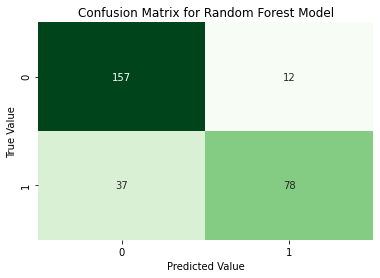

In [29]:
# Evaluate performance of the best model
percent_accuracy = round(metrics.accuracy_score(out_test, rf_model.predict(in_test)) * 100, 1)
print('Percentage Accuracy: {}%'.format(percent_accuracy))

confusion_matrix = metrics.confusion_matrix(out_test, rf_model.predict(in_test))

# Display the confusion matrix using Seaborn's heatmap
sns.heatmap(confusion_matrix, cmap = 'Greens', annot = True, fmt = '.0f', cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Part 2 - Writing

For this task, I chose to use a 'Random Forest' classifier to make predictions from the supplied data. I chose this type of model as it performs well for a variety of problems. In short it generates a set of simpler models called 'Decision Trees' that just look for splits in the data between points in similar ranges and gives each of these trees different properties, hence random. The forest as a whole performs better than any of the individual trees as it can average out their specific weaknesses. 
The main advantages of random forests are their aforementioned flexibility and the fact that they are effective even for fairly small training samples. They are also computationally inexpensive. Random forests will often be outperformed by more complex models for larger training sets but in this task with 850 samples the data set is definitely small.

The first step of the analysis is always to prepare the data. First off I replaced missing values 'NaNs' with the mean value of that column. Missing values must be treated as most machine learning algorithms can only function on numeric values. Best practice would actually be to create an extra feature (column) for each existing column that marks if a data point is missing or not with a 0 or a 1. This is because the absence of data may actually be telling us something. 
Next we must treat categoric variables as they too must be converted to numbers (called dummy variables) which encode the possible values e.g. 0 for male, 1 for female.

Once the data has been properly treated we can split it into a training set and a testing set, this done so we can evaluate the model's performance on data it hasn't seen before (the test set). A pipeline is then created for the model, this just feeds the data through a series of operations in one neat process. In this case the pipeline consists of a scaler (adjusts all the data points to be a proportion of that columns total range, to make columns comparable) and the random forest algorithm itself.
Before we can train the model, we need to chose some properties (hyperparameters). I established a list of possible values to try for each of the most important hyperparameters and used a function that chooses several random sets of hyperparamters and reports the best outcome.
Now, using the best hyperparameters, the model was ready to train. I passed in the training data and then checked the accuracy of the model against the test set, both as a percentage and with a confusion matrix. The confusion matrix is just a grid that shows how many times it was right and wrong for each possible case e.g. 1 that should be 0 is wrong, 0 that should be 0 is right.

In conclusion the model performed reasonably well but was more confident at predicting outputs of 0 than outputs of 1. This behaviour is to be expected as out of the 850 data points, only 313 had an output of 1. As such it was easier for the model to learn the 0 ouputs as it had more data for them.